# Introduction

## `Heart Attack` Prediction Using Different ML Models

Cardiovascular disease (CVD), with heart attacks as its most lethal manifestation, continues to be the predominant cause of mortality worldwide, accounting for millions of deaths annually. A heart attack, or myocardial infarction, is precipitated by an abrupt cessation of blood flow to the heart muscle. 

Numerous medical studies have underscored lifestyle as a fundamental determinant of this cardiac condition. In addition to lifestyle, there exists a multitude of critical indicators that can signal whether an individual is at risk of a heart attack. 

Despite the catastrophic consequences of heart attacks, they often occur unexpectedly, leaving individuals and their families exposed to sudden peril. The importance of early detection and risk evaluation cannot be overstated in the battle against this formidable disease. 

Encouragingly, the advent of machine learning has ushered in a new era of predictive tools, capable of assessing heart attack risk with unparalleled precision.

![image](R2.png)

Exploring a Medical Dataset for Heart Attack Prediction : [Kaggle Dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

This dataset contains medical information about patients, offering insights into their risk of heart attack. Leveraging these data, we will explore the dataset, investigate potential relationships, and ultimately classify the target variable, heart attack risk, using various machine learning algorithms. This process will identify the most suitable algorithm for this specific dataset, enabling accurate prediction and informed decision-making in healthcare

`Dictionary`:

| Variable  | Description |
| ----- | ----- |
| age | Age in years |
| sex | Sex (1 = male; 0 = female) |
| cp | Chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic) |
| trestbps | Resting blood pressure (in mm Hg on admission to the hospital) |
| chol | Serum cholestoral in mg/dl |
| fbs | (Fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) |
| restecg | Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria) |
| thalach | Maximum heart rate achieved |
| exang | Exercise induced angina (1 = yes; 0 = no) |
| oldpeak | ST depression induced by exercise relative to rest |
| slope | The slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping) |
| ca | Number of major vessels (0-3) colored by fluoroscopy |
| thal | Thalassemia (0 = normal; 1 = fixed defect; 2 = reversible defect) |
| target | Presence of heart disease (0 = no disease, 1 = disease) |

# **PACE stages**

![image](PACE_stages.png)

## **Pace: Plan**

#### Step 1. Imports

*   Import packages
*   Load dataset

##### Import packages

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.tree import plot_tree
from xgboost import plot_importance 

# Data Preprocessing
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.metrics import make_scorer

# Miscellaneous
import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')
from ydata_profiling import ProfileReport


##### Load dataset

Web site for the data [Kaggle](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

In [2]:
# Load dataset into a datafram
df0 = pd.read_csv("heart.csv")

# Display first few rows of the dataframe
df1 = df0.copy()
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#### Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand the dataset
- Clean your dataset (missing data, redundant data, outliers)

In [3]:
# basic information about the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
# descriptive statistics about the data
df1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##### Check missing values

In [5]:
# Check for missing values
df1.isna().sum().sum()

0

* No missing values 
* 1025 raws
* Total 14 columns (float64(1), int64(13))

##### Check duplicates

In [6]:
# Check for duplicates
print("numbers of duplicate in the data : ",df1.duplicated().sum())

numbers of duplicate in the data :  723


In [7]:
# Inspect some rows containing duplicates as needed
df1[df1.duplicated(keep=False)].head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df1.drop_duplicates(keep='first').reset_index(drop=True)
print("shape of the df with duplicates dropped: ", df.shape)

shape of the df with duplicates dropped:  (302, 14)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


## pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)

#### Overview of the Data

In [10]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Check the correclation between columns

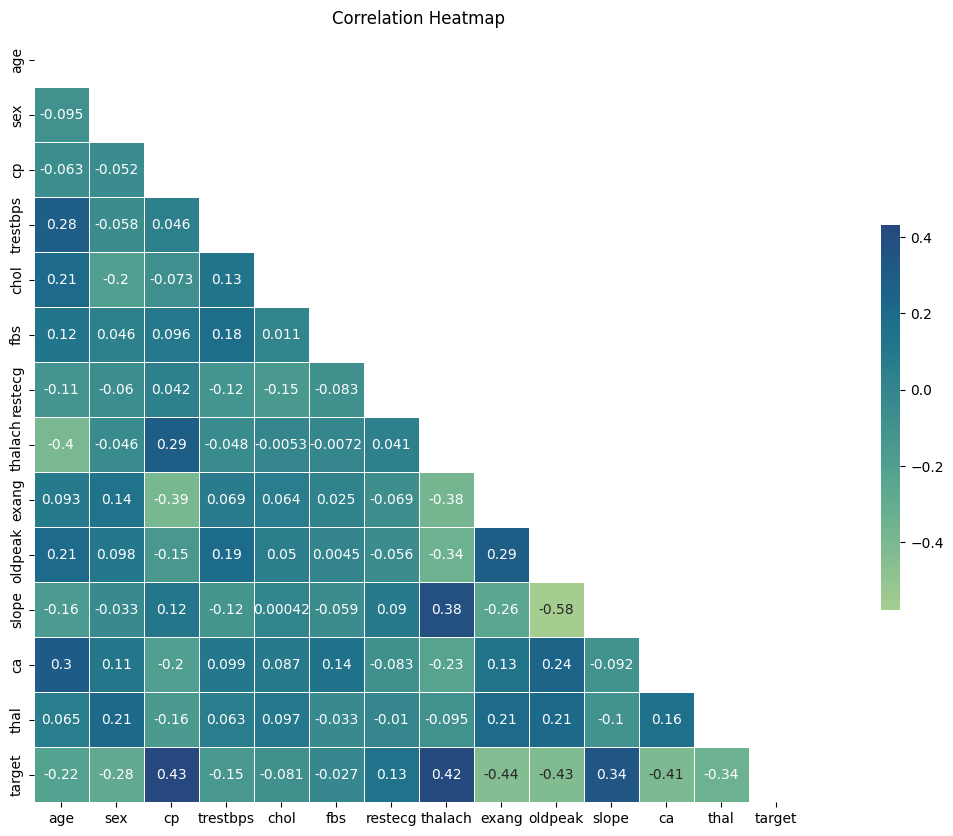

In [11]:
# Create a figure
plt.figure(figsize=(20, 10))

# Compute the correlation matrix for all the numeric columns in the dataframe
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr(method='pearson')

# Create a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap with annotations, using the 'crest' colormap
sns.heatmap(correlation_matrix, annot=True, cmap='crest', mask=mask, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap')
# Display the plot
plt.show()

## paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Evaluate model results to determine how well your model fits the data

### ML models

1) Logistic Regression (log_clf)
2) Gaussian Naive Bayes (gnb)
3) Decision Tree (Tree)
4) Random Forest Classifier (rf)
5) Extreme Gradient Boost (xgb)

#### Isolate, Split, StandardScaler, Metrics, Impact and Selection

##### Isolate the target and predictor variables

In [12]:
# isolate the predictor variables
X = df.copy()
X = X.drop("target", axis = 1)

# Isolate the target variable
y = df["target"]

In [13]:
# Calculates the relative frequency of unique values in 'y'.
y.value_counts(normalize=True)

target
1    0.543046
0    0.456954
Name: proportion, dtype: float64

It is crucial to verify the distribution of classes in your dataset prior to applying any machine learning algorithms. An imbalanced distribution, where one class significantly outnumbers another, can lead to a model that is biased towards the majority class. 

##### Split the data

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
# Get shape of each training and testing set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((226, 13), (76, 13), (226,), (76,))

##### StandardScaler

In machine learning, different features can have different ranges. For example, age might range from 0 to 100, while income might range from 0 to 100,000. This difference in scale can cause issues when training a model, as the feature with the larger scale may dominate the other features.

To prevent this, we use feature scaling, which brings all features to the same scale. The StandardScaler in your code standardizes features by removing the mean (making it 0) and scaling to unit variance (making it 1). This ensures that all features contribute equally to the model, improving its performance.

In [16]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

We have already checked the balance of the data, but we can re-check if it is necessary.

In [17]:
#from collections import Counter
#print(y_test.unique())
#Counter(y_train)

##### Evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.

##### Impact :

**Precision:**  choosing precision, aim to minimize false positives, which is important in situations where false positives can lead to financial burden due to overdiagnosis and unnecessary treatment.

**Recall:** While recall is useful in identifying all positive cases, it can be dangerous as it may miss potential cases, leading to severe consequences like death.

**F1 Score:**  is a harmonic mean of precision and recall, which balances both metrics equally. It provides a comprehensive evaluation of the model’s performance, making it a good choice when both precision and recall are important

##### Selection : 

The **F1 score** has been chosen as our primary evaluation metric, with **recall** as a secondary consideration. 

The **F1 score**, as a primary metric, ensures a balance between precision and recall. This balance is crucial in medical predictions, such as predicting heart attacks.

Prioritizing recall as a secondary metric emphasizes the importance of correctly identifying all actual positive cases (true positives). In this context, these are the actual occurrences of heart attacks. This approach underscores the critical nature of our task - minimizing the risk of overlooking any potential heart attacks.

#### `1) Logistic Regression(log_clf)`

In [18]:
# Construct a logistic regression model and fit it to the training set
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [19]:
# get predictions on the test set
y_pred = log_clf.predict(X_test)

##### Log_clf Performance

In [20]:
# Create a dictionary with metric names and corresponding values
lr_dict = {
    'model': ['Logistic Regression'],  
    'precision': precision_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    'F1': f1_score(y_test, y_pred),
    'accuracy': accuracy_score(y_test, y_pred),
    'AUC': roc_auc_score(y_test, y_pred)
}

# Convert the dictionary to a Pandas DataFrame
lr_results = pd.DataFrame(lr_dict)

# Print the table
lr_results

,model,precision,recall,F1,accuracy,AUC
0,Logistic Regression,0.711111,0.888889,0.790123,0.776316,0.781944


##### Confusion Matrix

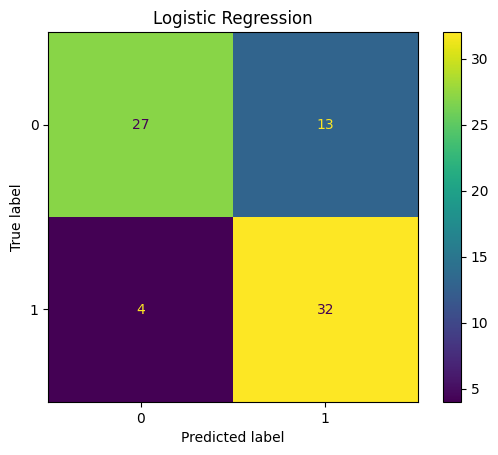

In [21]:
# Compute values for confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_clf.classes_)
disp.plot(values_format='')
plt.title('Logistic Regression')
plt.show()

`Notes`:

- True negatives (The upper-left): The number of instances where the model accurately predicted that a heart attack would not occur.

- False positives (The upper-right): The number of instances where the model incorrectly predicted a heart attack, even though it did not occur.

- False negatives (The bottom-left): The number of instances where the model incorrectly predicted that a heart attack would not occur, but it did.

- True positives (The bottom-right): The number of instances where the model accurately predicted a heart attack.

#### `2) Naive Bayes(gnb)`

 Naive Bayes algorithm, does not have a random_state parameter. This is because Naive Bayes is a deterministic algorithm that doesn’t involve any randomness in its computations, unlike some other algorithms such as logistic regression or tree-based models.

In [22]:
# Instantiate the model
gnb = GaussianNB()

In [23]:
# Fit the model to training data
gnb.fit(X_train, y_train)
# get predictions on the test set
y_pred = gnb.predict(X_test)

##### GNB Performance

In [24]:
# Create a dictionary with metric names and corresponding values
gnb_dict = {
    'model': ['Gaussian Naive Bayes'],  
    'precision': precision_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    'F1': f1_score(y_test, y_pred),
    'accuracy': accuracy_score(y_test, y_pred),
    'AUC': roc_auc_score(y_test, y_pred)
}

# Convert the dictionary to a Pandas DataFrame
gnb_results = pd.DataFrame(gnb_dict)

# Print the table
gnb_results

,model,precision,recall,F1,accuracy,AUC
0,Gaussian Naive Bayes,0.794872,0.861111,0.826667,0.828947,0.830556


##### Confusion Matrix

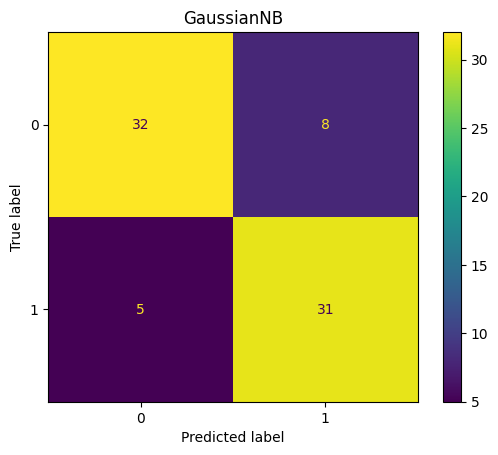

In [25]:
# Compute values for confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot(values_format='')
plt.title('GaussianNB')
plt.show()

####  `Tree-based Model` (`Decision Tree`, `Random Forest` and `XGBoost`)

##### `3) Decision tree (tree)`
**Baseline Model**

In [26]:
# Instantiate the model
decision_tree = DecisionTreeClassifier(random_state=42)

In [27]:
# Fit the model to training data
decision_tree.fit(X_train, y_train)
# Make predictions on test data
dt_pred = decision_tree.predict(X_test)

**Decision Tree Performance**

In [28]:
# Create a dictionary with metric names and corresponding values
dt_dict = {
    'model': ['Decision Tree'], 
    'precision': precision_score(y_test, dt_pred),
    'recall': recall_score(y_test, dt_pred),
    'F1': f1_score(y_test, dt_pred),
    'accuracy': accuracy_score(y_test, dt_pred),
    'AUC': roc_auc_score(y_test, dt_pred)
}

# Convert the dictionary to a Pandas DataFrame
dt_pred_results = pd.DataFrame(dt_dict)

# Print the table
dt_pred_results

,model,precision,recall,F1,accuracy,AUC
0,Decision Tree,0.742857,0.722222,0.732394,0.75,0.748611


##### `3.5) Tuning Decision trees` 

it can be particularly susceptible to overfitting. Combining hyperparameter tuning and grid search can help ensure this doesn’t happen

Utilize cross-validated hyperparameter tuning to identify the optimal parameters for the model.

In [29]:
# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[2,4,6,8,10,None],
             'min_samples_leaf': [2,4,6,8,10],
             'min_samples_split': [5,10,15]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree = GridSearchCV(decision_tree, cv_params, scoring=scoring, cv=4, refit='f1')

In [30]:
%%time
tree.fit(X_train, y_train)

CPU times: total: 2 s
Wall time: 3.06 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 8, 10, None],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [5, 10, 15]},
             refit='f1',
             scoring={'accuracy', 'f1', 'roc_auc', 'recall', 'precision'})

In [31]:
# Check best params
tree.best_params_

{'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 5}

In [32]:
# Check best F1 score on CV
tree.best_score_

0.8142121095750128

- Extract all the validation scores from the grid search. 

In [33]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                        })
  
    return table

In [34]:
# Get all CV scores
tree_cv_results = make_results('Decision Tree cv', tree, 'auc')
tree_cv_results

,model,precision,recall,F1,accuracy,AUC
0,Decision Tree cv,0.824261,0.804688,0.814212,0.791902,0.830983


- Gets all the scores from a model's predictions.

In [35]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table


In [36]:
# Get predictions on test data
tree_test_scores = get_scores('Decision Tree Test', tree, X_test, y_test)
tree_test_scores


,model,precision,recall,F1,accuracy,AUC
0,Decision Tree Test,0.692308,0.75,0.72,0.723684,0.725


**Confusion Matrix**

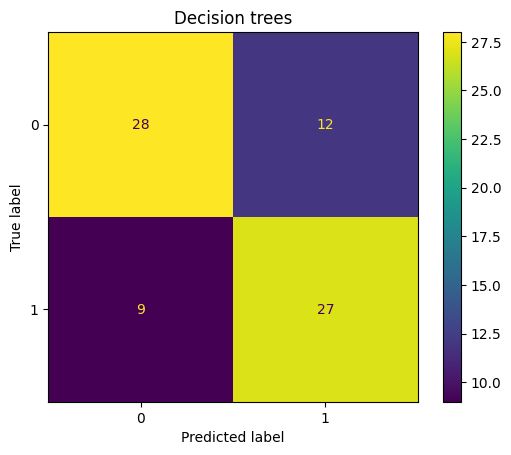

In [37]:
# confusion matrix
preds = tree.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=tree.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree.classes_)
disp.plot(values_format='')
plt.title('Decision trees')
plt.show()

**Plot the Decision tree**

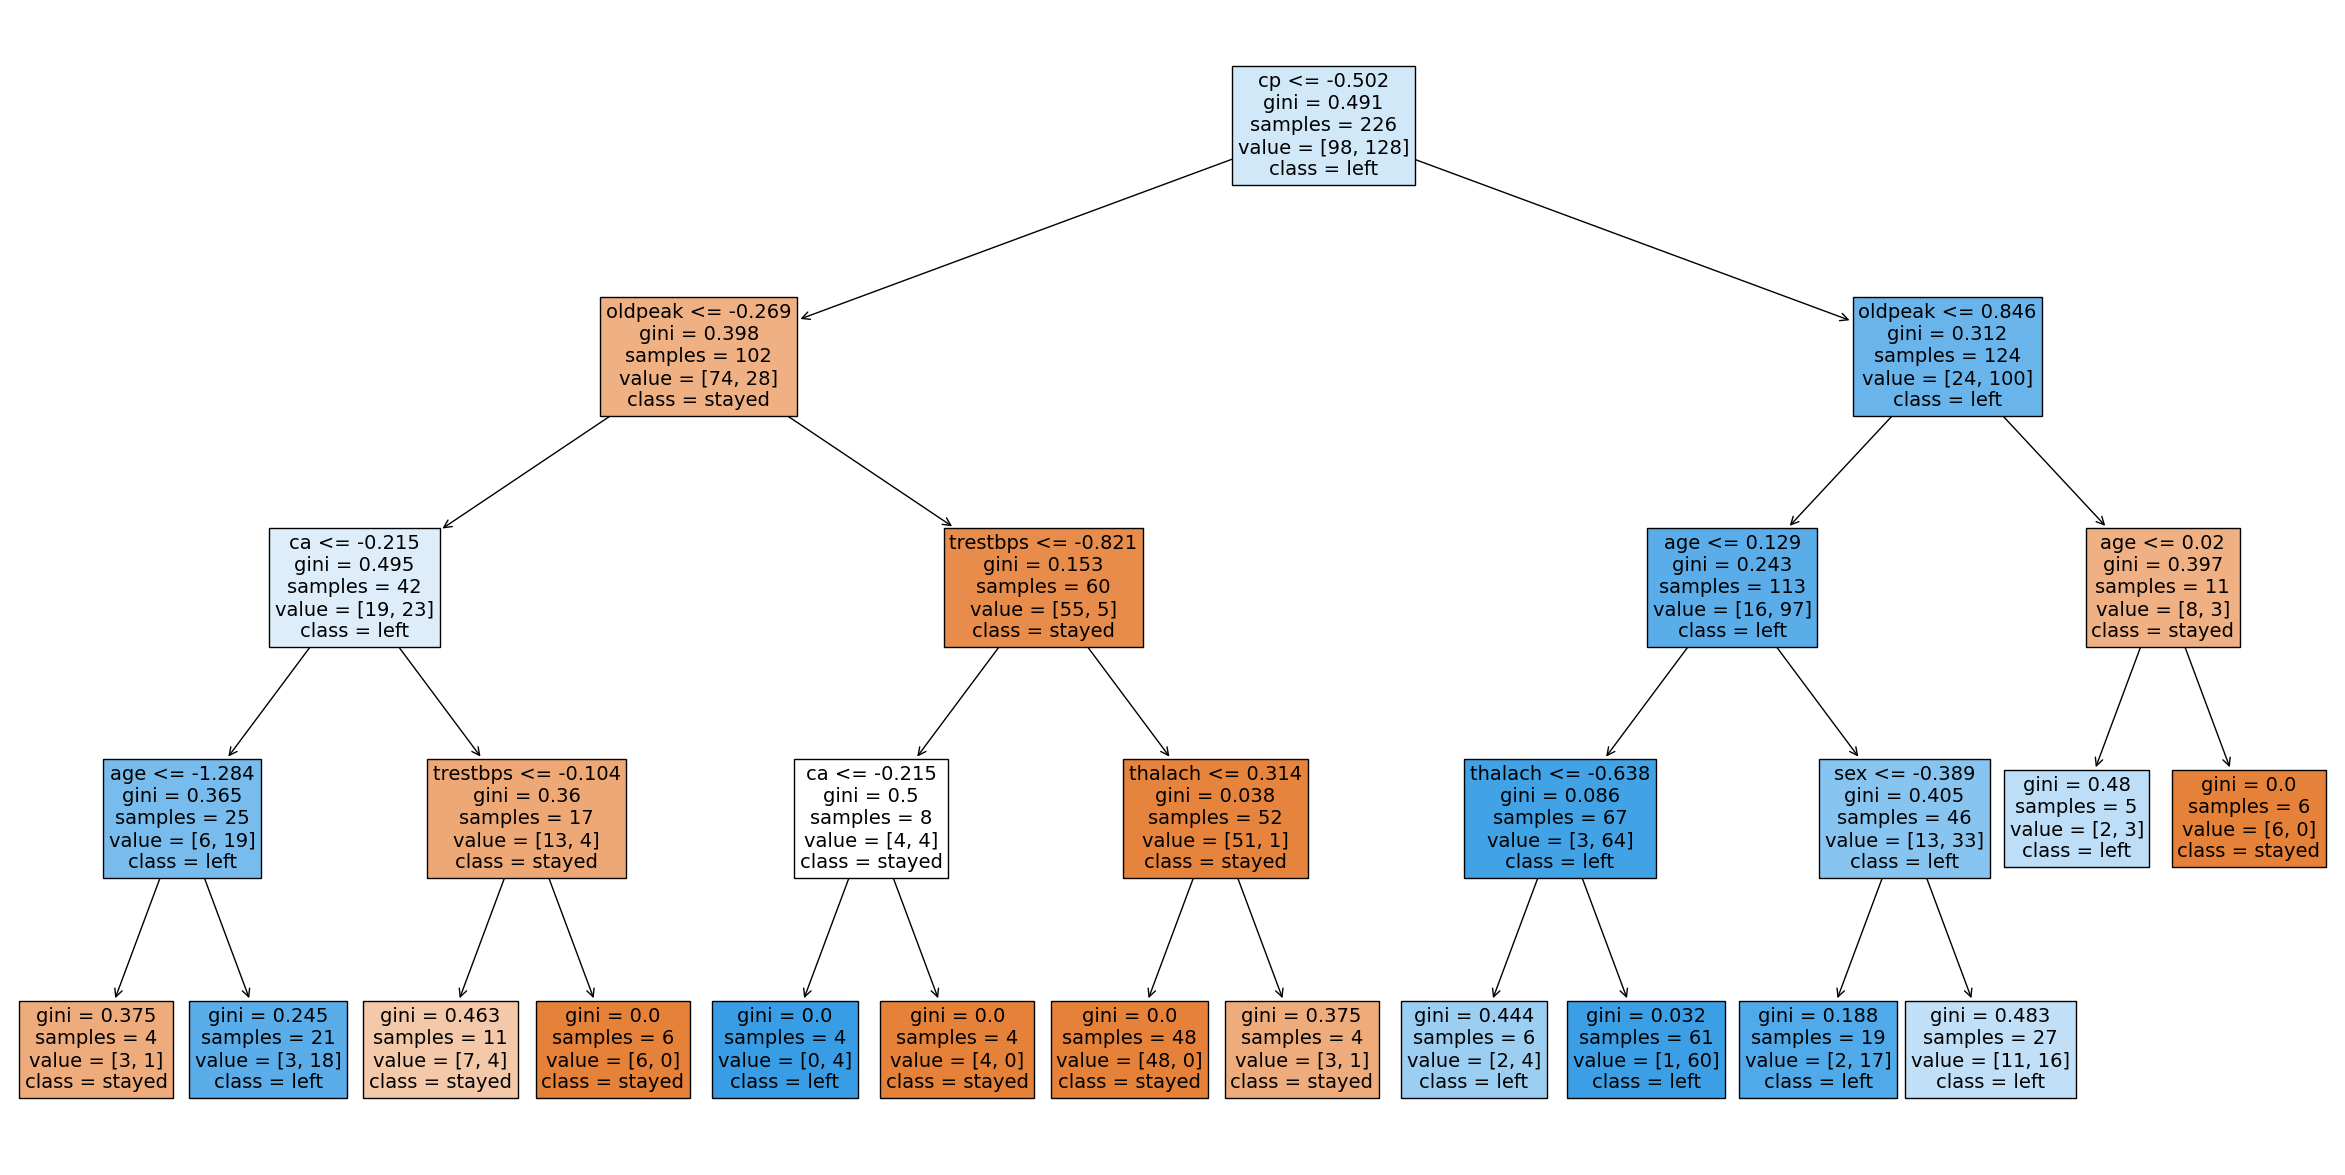

In [38]:
# Plot the tree
plt.figure(figsize=(30,15))
plot_tree(tree.best_estimator_,
          max_depth=5, fontsize=14, feature_names=X.columns, 
          class_names={ 1:'left',0: 'stayed'}, filled=True);
plt.show()

##### `4) Random forest (rf)` 
Tuning & Cross-Validation

In [39]:
# Create a Random Forest Classifier with a specified random state
rf = RandomForestClassifier(random_state=42)

# Define a dictionary of hyperparameters to search over using GridSearchCV
cv_params = {'max_depth': [3], 
             'max_features': [1.0],
             'max_samples': [0.2],
             'min_samples_leaf': [1],
             'min_samples_split': [4],
             'n_estimators': [100],
             }  

# Define a set of scoring metrics to capture during cross-validation
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearchCV with the Random Forest Classifier, hyperparameters, scoring, and cross-validation setup
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1')


`Note` : After finding the best parameters, I use them to make the model run faster when I want to use the model later.

In [40]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: total: 547 ms
Wall time: 931 ms


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3], 'max_features': [1.0],
                         'max_samples': [0.2], 'min_samples_leaf': [1],
                         'min_samples_split': [4], 'n_estimators': [100]},
             refit='f1',
             scoring={'accuracy', 'f1', 'roc_auc', 'recall', 'precision'})

In [41]:
# Check best params
rf_cv.best_params_

{'max_depth': 3,
 'max_features': 1.0,
 'max_samples': 0.2,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [42]:
# Check best F1 score on CV
rf_cv.best_score_

0.8682670696737194

In [43]:
# Get all CV scores
rf_cv_results = make_results('Random Forest cv', rf_cv, 'auc')
rf_cv_results

,model,precision,recall,F1,accuracy,AUC
0,Random Forest cv,0.821034,0.921875,0.868267,0.840617,0.874271


In [44]:
# Get predictions on test data
rf_test_scores = get_scores('Random Forest Test', rf_cv, X_test, y_test)
rf_test_scores

,model,precision,recall,F1,accuracy,AUC
0,Random Forest Test,0.756098,0.861111,0.805195,0.802632,0.805556


**Confusion Matrix**

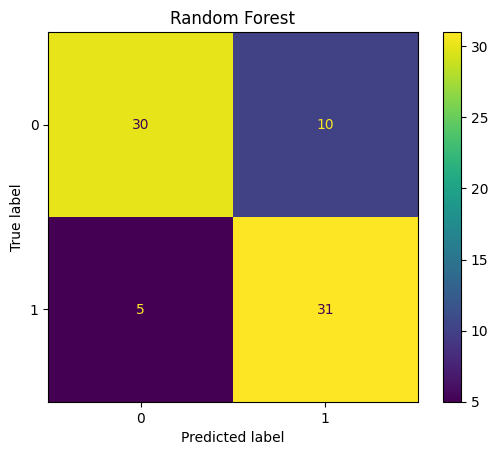

In [45]:
# confusion matrix
preds = rf_cv.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_cv.classes_)
disp.plot(values_format='')
plt.title('Random Forest')
plt.show()

##### `5) XGBoost (xgb)`

In [46]:
# Instantiate the model
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# Assign a dictionary of hyperparameters to search over
cv_params = {'learning_rate': [0.29],
            'max_depth': [12],
            'min_child_weight': [2],
            'n_estimators': [126],
            'subsample': [0.82],
            'colsample_bytree': [0.37],
            'reg_lambda': [125],
            'colsample_bynode': [0.53],
            'seed': [542]
            }

#Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1')

`Note` : After finding the best parameters, I use them to make the model run faster when I want to use the model later.

In [47]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: total: 1.12 s
Wall time: 246 ms


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bynode': [0.53], 'colsample_bytree': [0.37],
                         'learning_rate': [0.29], 'max_depth': [12],
                         'min_child_weight': [2], 'n_estimators': [126],
                         'reg_lambda': [125], 'seed': [542],
                         'subsample': [0.82]},
             refit='f1',
             scoring={'accuracy', 'f1', 'roc_auc', 'recall', 'precision'})

In [48]:
# Check best params
xgb_cv.best_params_

{'colsample_bynode': 0.53,
 'colsample_bytree': 0.37,
 'learning_rate': 0.29,
 'max_depth': 12,
 'min_child_weight': 2,
 'n_estimators': 126,
 'reg_lambda': 125,
 'seed': 542,
 'subsample': 0.82}

In [49]:
# Check best F1 score on CV
xgb_cv.best_score_

0.8547392905601862

In [50]:
# Get all CV validation scores
xgb_cv_results = make_results('XGBoost cv', xgb_cv, 'auc')
xgb_cv_results

,model,precision,recall,F1,accuracy,AUC
0,XGBoost cv,0.815922,0.898438,0.854739,0.827381,0.900885


In [51]:
# Get predictions on test
xgb_test_scores = get_scores('XGBoost Test', xgb_cv, X_test, y_test)
xgb_test_scores

,model,precision,recall,F1,accuracy,AUC
0,XGBoost Test,0.767442,0.916667,0.835443,0.828947,0.833333


**Confusion Matrix**

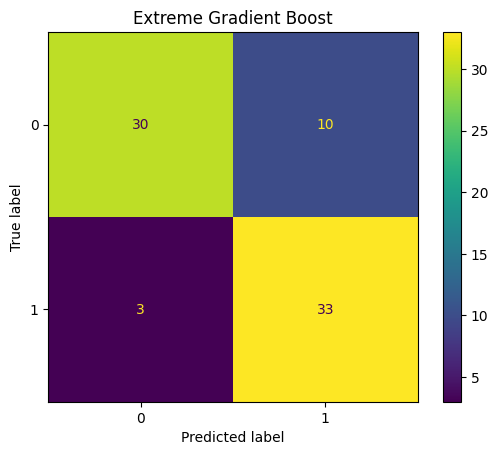

In [52]:
# confusion matrix
preds = xgb_cv.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=xgb_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb_cv.classes_)
disp.plot(values_format='')
plt.title('Extreme Gradient Boost')
plt.show()

#### Validation and Test of the ML models

##### `Validation`

In [53]:
# Concatenate all the validation scores dataframes.
result = pd.concat([tree_cv_results, rf_cv_results ,xgb_cv_results])
result

,model,precision,recall,F1,accuracy,AUC
0,Decision Tree cv,0.824261,0.804688,0.814212,0.791902,0.830983
0,Random Forest cv,0.821034,0.921875,0.868267,0.840617,0.874271
0,XGBoost cv,0.815922,0.898438,0.854739,0.827381,0.900885


##### `Test`

In [54]:
# Concatenate all the test scores dataframes.
test = pd.concat([lr_results, gnb_results, dt_pred_results, tree_test_scores, rf_test_scores, xgb_test_scores])
test

,model,precision,recall,F1,accuracy,AUC
0,Logistic Regression,0.711111,0.888889,0.790123,0.776316,0.781944
0,Gaussian Naive Bayes,0.794872,0.861111,0.826667,0.828947,0.830556
0,Decision Tree,0.742857,0.722222,0.732394,0.750000,0.748611
0,Decision Tree Test,0.692308,0.750000,0.720000,0.723684,0.725000
0,Random Forest Test,0.756098,0.861111,0.805195,0.802632,0.805556
0,XGBoost Test,0.767442,0.916667,0.835443,0.828947,0.833333


#### The champion model `Confusion Matrix` and `Feature Importances`

Based on the results, it appears that the `XGBoost` model consistently outperforms the other models in most metrics during the testing phase, with the exception of precision where the `Gaussian Naive Bayes` model excels.

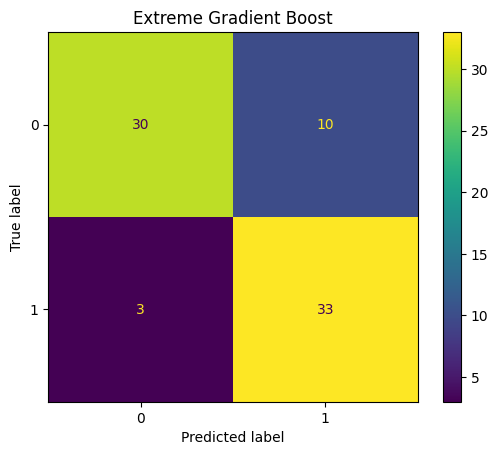

In [55]:
# confusion matrix
preds = xgb_cv.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=xgb_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb_cv.classes_)
disp.plot(values_format='')
plt.title('Extreme Gradient Boost')
plt.show()

- True Negatives (TN): The model correctly predicted 30 negative instances. This means that there were 30 instances where the model correctly predicted the absence of a heart attack.

- False Positives (FP): The model incorrectly predicted 10 positive instances. This means that there were 10 instances where the model predicted a heart attack, but it was actually not the case.

- True Positives (TP): The model correctly predicted 33 positive instances. This means that there were 33 instances where the model correctly predicted a heart attack.

- False Negatives (FN): The model incorrectly predicted 3 negative instances. This means that there were 3 instances where the model predicted the absence of a heart attack, but a heart attack did occur.

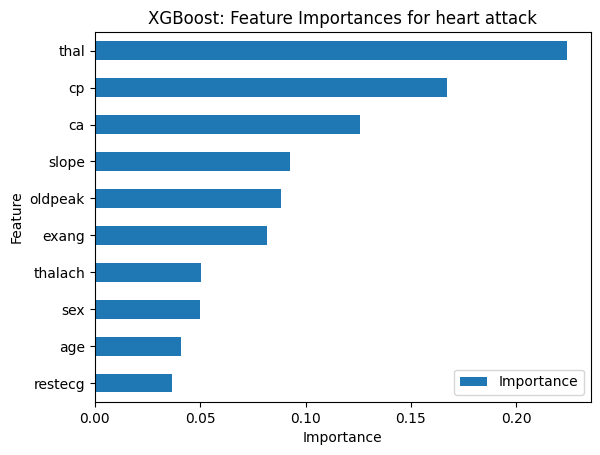

In [56]:
# Get feature importances
feat_impt = xgb_cv.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(xgb_cv.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("XGBoost: Feature Importances for heart attack", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

## pacE: Execute Stage
- Interpret model performance and results

### Summary of model results

In [57]:
# print all the ml models
test

,model,precision,recall,F1,accuracy,AUC
0,Logistic Regression,0.711111,0.888889,0.790123,0.776316,0.781944
0,Gaussian Naive Bayes,0.794872,0.861111,0.826667,0.828947,0.830556
0,Decision Tree,0.742857,0.722222,0.732394,0.750000,0.748611
0,Decision Tree Test,0.692308,0.750000,0.720000,0.723684,0.725000
0,Random Forest Test,0.756098,0.861111,0.805195,0.802632,0.805556
0,XGBoost Test,0.767442,0.916667,0.835443,0.828947,0.833333


Based on the results, it appears that the `XGBoost` model consistently outperforms the other models in most metrics during the testing phase, with the exception of precision where the `Gaussian Naive Bayes` model excels. 

This suggests that the `XGBoost` model is not only effective but also stable, making it a robust choice for our final model. Its high performance in terms of both F1 score and recall indicates its ability to balance precision and sensitivity effectively, which is crucial in the context of predicting heart attacks.